(2024, 277.7130270883637)
(2024, 1725.0467670897024)
(2024, 1442.952537555379)
(2024, 587.8654877532158)
(2024, 654.4597191521977)
(2024, 630.1711891745587)
(2024, 375.2019924295904)
(2024, 414.3943847858665)
(2024, 533.6615415881224)


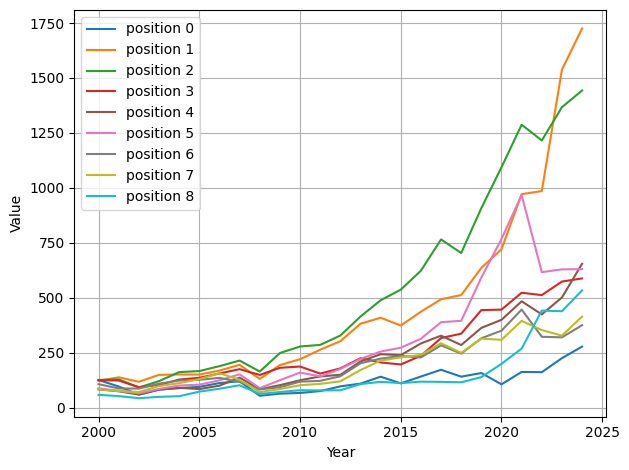

In [1]:
#Annual Rebalancing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empyrical import max_drawdown
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

#yearly returns calculation
def yearly_returns(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) 
    returns = {}
    for year in range(1999, 2025): 
        start_date = f"{year-1}-12-31"
        end_date = f"{year}-12-31"
        start_price = df['Adj Close'].loc[:start_date].iloc[-1]
        end_price = df['Adj Close'].loc[:end_date].iloc[-1]
        yearly_return = (end_price - start_price) / start_price
        returns[year] = yearly_return
    return pd.Series(returns)

data = {
    'xlb': pd.read_csv("xlb_weekly_return_detailed.csv"),
    'xle': pd.read_csv("xle_weekly_return_detailed.csv"),
    'xlf': pd.read_csv("xlf_weekly_return_detailed.csv"),
    'xli': pd.read_csv("xli_weekly_return_detailed.csv"),
    'xlk': pd.read_csv("xlk_weekly_return_detailed.csv"),
    'xlp': pd.read_csv("xlp_weekly_return_detailed.csv"),
    'xlu': pd.read_csv("xlu_weekly_return_detailed.csv"),
    'xlv': pd.read_csv("xlv_weekly_return_detailed.csv"),
    'xly': pd.read_csv("xly_weekly_return_detailed.csv")
}

yearly_returns_dict = {key: yearly_returns(df) for key, df in data.items()}
final_df = pd.DataFrame(yearly_returns_dict)
final_df.index.name = 'Date'

cash_all=[]
for i in range(9):
    cash_l = 100
    cash_annual_l = []

    #cash calculation
    for year in range(1999, 2024):
        sorted_returns = final_df.loc[year].sort_values()
        next_year = year + 1
        if next_year in final_df.index:
            returns_next_year_l = final_df.loc[next_year][sorted_returns.index[i]]
            total_return_l = ((cash_l) * (1 + returns_next_year_l)).sum()
            cash_l = total_return_l
            cash_annual_l.append((year + 1, cash_l))
    cash_all.append(cash_annual_l)

for i in range(9):
    print(cash_all[i][-1])
import matplotlib.pyplot as plt
colors = plt.cm.tab10(np.linspace(0, 1, 9))
# Sample: plotting cash_all[0:9]
for i in range(9):
    years, values = zip(*cash_all[i])
    plt.plot(years, values, label=f'position {i}', color=colors[i])

plt.xlabel('Year')
plt.ylabel('Value')
#plt.title('Cash Value Curves (2000–2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

('2024-02', 774.6579593248788)
('2024-02', 860.2411134399879)
('2024-02', 351.2891486883048)
('2024-02', 569.3047624880186)
('2024-02', 1103.9343532693845)
('2024-02', 211.1374737297097)
('2024-02', 467.26979380383693)
('2024-02', 809.3180067484404)
('2024-02', 1183.7998824775127)


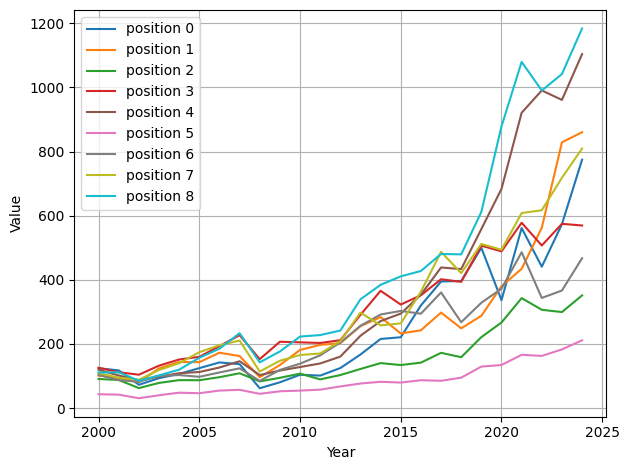

In [2]:
#Semi-Annual Rebalancing
import pandas as pd
import matplotlib.pyplot as plt
from empyrical import max_drawdown

#returns calculation
def semi_annual_returns(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) 
    returns = {}
    for year in range(1999, 2025):
        start_date_1 = f"{year-1}-12-31"
        end_date_1 = f"{year}-06-30"
        start_price_1 = df['Adj Close'].loc[:start_date_1].iloc[-1]
        end_price_1 = df['Adj Close'].loc[:end_date_1].iloc[-1]
        half_year_return_1 = (end_price_1 - start_price_1) / start_price_1
        returns[f"{year}-01"] = half_year_return_1
        
        start_date_2 = f"{year}-06-30"
        end_date_2 = f"{year}-12-31"
        start_price_2 = df['Adj Close'].loc[:start_date_2].iloc[-1]
        end_price_2 = df['Adj Close'].loc[:end_date_2].iloc[-1]
        half_year_return_2 = (end_price_2 - start_price_2) / start_price_2
        returns[f"{year}-02"] = half_year_return_2
    
    return pd.Series(returns)

data = {
    'xlb': pd.read_csv("xlb_weekly_return_detailed.csv"),
    'xle': pd.read_csv("xle_weekly_return_detailed.csv"),
    'xlf': pd.read_csv("xlf_weekly_return_detailed.csv"),
    'xli': pd.read_csv("xli_weekly_return_detailed.csv"),
    'xlk': pd.read_csv("xlk_weekly_return_detailed.csv"),
    'xlp': pd.read_csv("xlp_weekly_return_detailed.csv"),
    'xlu': pd.read_csv("xlu_weekly_return_detailed.csv"),
    'xlv': pd.read_csv("xlv_weekly_return_detailed.csv"),
    'xly': pd.read_csv("xly_weekly_return_detailed.csv")
}

semi_annual_returns_dict = {key: semi_annual_returns(df) for key, df in data.items()}
final_df = pd.DataFrame(semi_annual_returns_dict)
final_df.index.name = 'Date'

cash_all=[]
for i in range(9):
    cash_l = 100
    cash_semi_annual_l = []

#cash calculation
    for period in final_df.index[1:-1]:
        sorted_returns = final_df.loc[period].sort_values()
        next_period = final_df.index[final_df.index.get_loc(period) + 1]
        returns_next_period_l = final_df.loc[next_period][sorted_returns.index[i]]
        total_return_l = ((cash_l) * (1 + returns_next_period_l)).sum()
        cash_l = total_return_l
        cash_semi_annual_l.append((next_period, cash_l))
    cash_all.append(cash_semi_annual_l)
     
for i in range(9):
    print(cash_all[i][-1])
colors = plt.cm.tab10(np.linspace(0, 1, 9))

for i in range(9):
    years, values = zip(*cash_all[i][1::2])
    plt.plot(range(2000,2025), values, label=f'position {i}', color=colors[i])

plt.xlabel('Year')
plt.ylabel('Value')
#plt.title('Cash Value Curves (2000–2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

('2024-Q4', 396.9200780459411)
('2024-Q4', 2553.6655157632426)
('2024-Q4', 254.19709249740137)
('2024-Q4', 346.95754991301567)
('2024-Q4', 700.323144865724)
('2024-Q4', 1201.3276542556835)
('2024-Q4', 947.1350733171168)
('2024-Q4', 796.1572845992835)
('2024-Q4', 245.20468219726305)


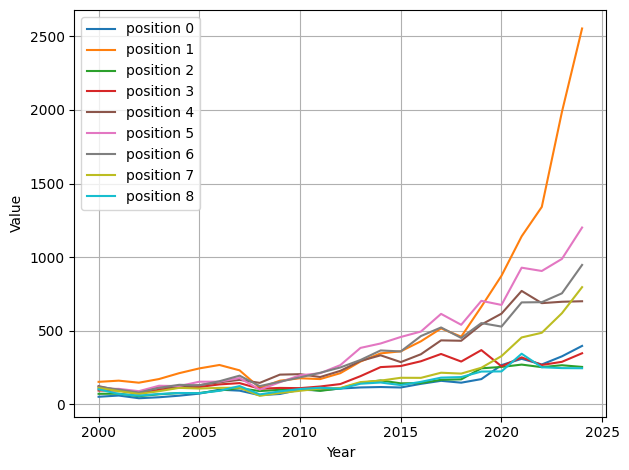

In [3]:
# Quarterly Rebalancing

import pandas as pd
import matplotlib.pyplot as plt

#returns calculations
def quarterly_returns(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) 
    returns = {}
    for year in range(1999, 2025):
        
        start_date_1 = f"{year-1}-12-31"
        end_date_1 = f"{year}-03-31"
        start_price_1 = df['Adj Close'].loc[:start_date_1].iloc[-1]
        end_price_1 = df['Adj Close'].loc[:end_date_1].iloc[-1]
        quarter_return_1 = (end_price_1 - start_price_1) / start_price_1
        returns[f"{year}-Q1"] = quarter_return_1
        
        start_date_2 = f"{year}-03-31"
        end_date_2 = f"{year}-06-30"
        start_price_2 = df['Adj Close'].loc[:start_date_2].iloc[-1]
        end_price_2 = df['Adj Close'].loc[:end_date_2].iloc[-1]
        quarter_return_2 = (end_price_2 - start_price_2) / start_price_2
        returns[f"{year}-Q2"] = quarter_return_2
        
        start_date_3 = f"{year}-06-30"
        end_date_3 = f"{year}-09-30"
        start_price_3 = df['Adj Close'].loc[:start_date_3].iloc[-1]
        end_price_3 = df['Adj Close'].loc[:end_date_3].iloc[-1]
        quarter_return_3 = (end_price_3 - start_price_3) / start_price_3
        returns[f"{year}-Q3"] = quarter_return_3
        
        start_date_4 = f"{year}-09-30"
        end_date_4 = f"{year}-12-31"
        start_price_4 = df['Adj Close'].loc[:start_date_4].iloc[-1]
        end_price_4 = df['Adj Close'].loc[:end_date_4].iloc[-1]
        quarter_return_4 = (end_price_4 - start_price_4) / start_price_4
        returns[f"{year}-Q4"] = quarter_return_4
    
    return pd.Series(returns)

data = {
    'xlb': pd.read_csv("xlb_weekly_return_detailed.csv"),
    'xle': pd.read_csv("xle_weekly_return_detailed.csv"),
    'xlf': pd.read_csv("xlf_weekly_return_detailed.csv"),
    'xli': pd.read_csv("xli_weekly_return_detailed.csv"),
    'xlk': pd.read_csv("xlk_weekly_return_detailed.csv"),
    'xlp': pd.read_csv("xlp_weekly_return_detailed.csv"),
    'xlu': pd.read_csv("xlu_weekly_return_detailed.csv"),
    'xlv': pd.read_csv("xlv_weekly_return_detailed.csv"),
    'xly': pd.read_csv("xly_weekly_return_detailed.csv")
}
quarterly_returns_dict = {key: quarterly_returns(df) for key, df in data.items()}
final_df = pd.DataFrame(quarterly_returns_dict)
final_df.index.name = 'Date'

cash_all=[]
for i in range(9):
    cash_l = 100
    cash_quarterly_l = []

#cash calculation
    for period in final_df.index[3:-1]:
        sorted_returns = final_df.loc[period].sort_values()
        next_period = final_df.index[final_df.index.get_loc(period) + 1]
        returns_next_period_l = final_df.loc[next_period][sorted_returns.index[i]]
        total_return_l = ((cash_l) * (1 + returns_next_period_l)).sum()
        cash_l = total_return_l
        cash_quarterly_l.append((next_period, cash_l))
    cash_all.append(cash_quarterly_l)
     
for i in range(9):
    print(cash_all[i][-1])
# Sample: plotting cash_all[0:9]
colors = plt.cm.tab10(np.linspace(0, 1, 9))
for i in range(9):
    years, values = zip(*cash_all[i][3::4])
    plt.plot(range(2000,2025), values, label=f'position {i}', color=colors[i])

plt.xlabel('Year')
plt.ylabel('Value')
#plt.title('Cash Value Curves (2000–2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

('2024-12', 325.58793587721203)
('2024-12', 766.8462754025509)
('2024-12', 385.73699509462193)
('2024-12', 1921.5467125883918)
('2024-12', 485.5206181687041)
('2024-12', 2257.6166345907595)
('2024-12', 702.8270539640315)
('2024-12', 237.33335029034808)
('2024-12', 410.9883728136202)


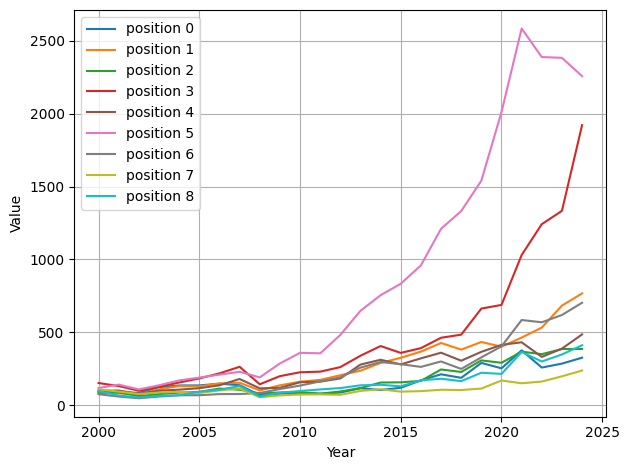

In [4]:
#Monthly Rebalancing
import pandas as pd
import numpy as np
from calendar import monthrange
from empyrical import max_drawdown

# returns
def monthly_returns(df):
    """Calculate monthly returns from daily price data"""
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    
    returns = {}
    for year in range(1999, 2025):
        for month in range(1, 13):
            # Get last day of previous month
            start_date = pd.Timestamp(year=year, month=month, day=1) - pd.Timedelta(days=1)
            # Get last day of current month
            end_date = pd.Timestamp(year=year, month=month, day=monthrange(year, month)[1])
            
            try:
                start_price = df['Adj Close'].loc[:start_date].iloc[-1]
                end_price = df['Adj Close'].loc[:end_date].iloc[-1]
                returns[f"{year}-{month:02d}"] = (end_price - start_price) / start_price
            except IndexError:
                continue
    
    return pd.Series(returns)

#load data
etfs = ['xlb', 'xle', 'xlf', 'xli', 'xlk', 'xlp', 'xlu', 'xlv', 'xly']
data = {etf: pd.read_csv(f"{etf}_weekly_return_detailed.csv") for etf in etfs}
monthly_returns_dict = {key: monthly_returns(df) for key, df in data.items()}
final_df = pd.DataFrame(monthly_returns_dict)
final_df.index.name = 'Date'


cash_all=[]
for i in range(9):
    cash_l = 100
    cash_monthly_l = []

#cash calculation
    for period in final_df.index[11:-1]:
        sorted_returns = final_df.loc[period].sort_values()
        next_period = final_df.index[final_df.index.get_loc(period) + 1]
        returns_next_period_l = final_df.loc[next_period][sorted_returns.index[i]]
        total_return_l = ((cash_l) * (1 + returns_next_period_l)).sum()
        cash_l = total_return_l
        cash_monthly_l.append((next_period, cash_l))
    cash_all.append(cash_monthly_l)
     
for i in range(9):
    print(cash_all[i][-1])
colors = plt.cm.tab10(np.linspace(0, 1, 9))
for i in range(9):
    years, values = zip(*cash_all[i][11::12])
    plt.plot(range(2000,2025), values, label=f'position {i}', color=colors[i])

plt.xlabel('Year')
plt.ylabel('Value')
#plt.title('Cash Value Curves (2000–2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

('2024-52', 1386.5743113036328)
('2024-52', 691.9310680975408)
('2024-52', 864.1135976742763)
('2024-52', 1160.7385933957644)
('2024-52', 786.8437118492079)
('2024-52', 376.3822510132642)
('2024-52', 513.61554787712)
('2024-52', 195.50960894794952)
('2024-52', 485.9352215872619)


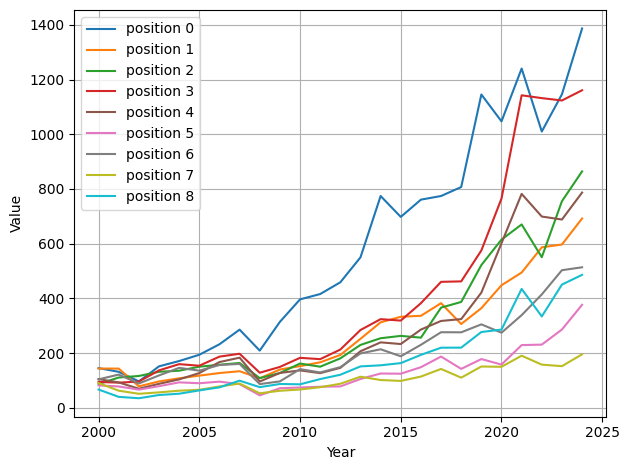

In [5]:
# Weekly Rebalancing
import pandas as pd
import numpy as np
from empyrical import max_drawdown
import matplotlib.pyplot as plt

# Load Data
etfs = ['xlb', 'xle', 'xlf', 'xli', 'xlk', 'xlp', 'xlu', 'xlv', 'xly']
data = {etf: pd.read_csv(f"{etf}_weekly_return_detailed.csv") for etf in etfs}

# Weekly return calculation
def calculate_weekly_returns(data):
    results = {}
    for name, df in data.items():
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df = df.set_index('Date')
        weekly_returns = []
        # Get the last close of the week before 1999
        prev_week = df[df['Year_Week'] == '1998-52']
        if prev_week.empty:
            continue
        r1 = prev_week['Adj Close'].iloc[-1]
        for week in df[df.index.year >= 1999]['Year_Week'].unique():
            week_data = df[df['Year_Week'] == week]
            if not week_data.empty:
                r2 = week_data['Adj Close'].iloc[-1]
                weekly_return = (r2 - r1) / r1
                weekly_returns.append((week, weekly_return))
                r1 = r2
            else:
                weekly_returns.append((week, np.nan))
        results[name] = pd.DataFrame(weekly_returns, columns=['Year_Week', 'Weekly_Return'])
    return results

weekly_returns_dict = calculate_weekly_returns(data)

final_df = pd.DataFrame({key: df['Weekly_Return'].values for key, df in weekly_returns_dict.items()})
final_df.index = weekly_returns_dict[list(weekly_returns_dict.keys())[0]]['Year_Week']
final_df.index.name = 'Year_Week'

cash_all=[]
for i in range(9):
    cash_l = 100
    cash_weekly_l = []

#cash calculation
    for period in final_df.index[51:-1]:
        sorted_returns = final_df.loc[period].sort_values()
        next_period = final_df.index[final_df.index.get_loc(period) + 1] 
        returns_next_period_l = final_df.loc[next_period][sorted_returns.index[i]]
        total_return_l = ((cash_l) * (1 + returns_next_period_l)).sum()
        cash_l = total_return_l
        cash_weekly_l.append((next_period, cash_l))
    cash_all.append(cash_weekly_l)
for i in range(9):
     print(cash_all[i][-1])
def get_last_values_per_year(cash):
    last_values = {}
    for week, value in cash:
        year = week[:4]
        week_number = int(week[5:])        
        if year not in last_values or week_number > last_values[year][0]:
            last_values[year] = (week_number, value)
    result = [(year, value[1]) for year, value in last_values.items()]
    return sorted(result) 
for i in range(9):
    cash_all[i]=get_last_values_per_year(cash_all[i])

colors = plt.cm.tab10(np.linspace(0, 1, 9))
for i in range(9):
    years, values = zip(*cash_all[i])
    plt.plot(range(2000, 2025), values, label=f'position {i}',color=colors[i])

plt.xlabel('Year')
plt.ylabel('Value')
#plt.title('Cash Value Curves (2000–2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()   

(Timestamp('2024-12-31 00:00:00'), 1245.1065080789701)
(Timestamp('2024-12-31 00:00:00'), 2462.2324940381236)
(Timestamp('2024-12-31 00:00:00'), 2240.121000648229)
(Timestamp('2024-12-31 00:00:00'), 471.200472463639)
(Timestamp('2024-12-31 00:00:00'), 1170.1194892767312)
(Timestamp('2024-12-31 00:00:00'), 617.2116006801194)
(Timestamp('2024-12-31 00:00:00'), 339.13004687334484)
(Timestamp('2024-12-31 00:00:00'), 137.45813412099974)
(Timestamp('2024-12-31 00:00:00'), 127.64380523156369)


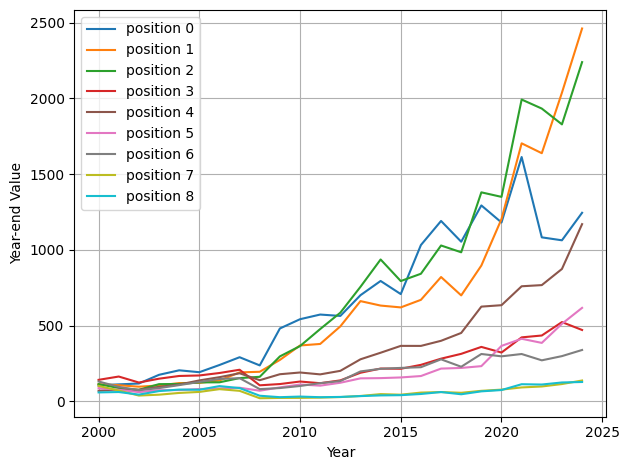

In [6]:
# daily rebalancing
import pandas as pd
import numpy as np
from empyrical import max_drawdown
import matplotlib.pyplot as plt

# Load data
etfs = ['xlb', 'xle', 'xlf', 'xli', 'xlk', 'xlp', 'xlu', 'xlv', 'xly']
data = {etf: pd.read_csv(f"{etf}_weekly_return_detailed.csv") for etf in etfs}

# daily returns
def calculate_daily_returns(data):
    results = {}
    for name, df in data.items():
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')
        df = df.set_index('Date')
        df['Daily_Return'] = df['Adj Close'].pct_change()
        results[name] = df[['Daily_Return']].copy()
    return results

daily_returns_dict = calculate_daily_returns(data)

final_df = pd.DataFrame({key: df['Daily_Return'] for key, df in daily_returns_dict.items()})
final_df = final_df.loc['1999-12-31':]  # Start from specified date

# Cash Calculation
cash_all = []
for i in range(9):
    cash_l = 100
    cash_daily_l = []
    
    for date in final_df.index[:-1]:  # Skip first day for lookback
        # Get previous day's returns
        prev_day = final_df.index[final_df.index.get_loc(date)]
        sorted_returns = final_df.loc[prev_day].sort_values()
        
        # Invest in next day's returns
        next_day = final_df.index[final_df.index.get_loc(date) + 1]
        returns_next_day = final_df.loc[next_day][sorted_returns.index[i]]
        
        total_return_l = cash_l * (1 + returns_next_day)
        cash_l = total_return_l
        cash_daily_l.append((next_day, cash_l))
    
    cash_all.append(cash_daily_l)

for i in range(9):
    print(cash_all[i][-1])
colors = plt.cm.tab10(np.linspace(0, 1, 9))
for i in range(9):
    df = pd.DataFrame(cash_all[i], columns=["Date", "Value"])
    df['Year'] = df['Date'].dt.year
    # Get last value for each year
    last_values = df.groupby('Year').last().reset_index()
    
    # Plot
    plt.plot(range(2000,2025), last_values['Value'], label=f'position {i}', color=colors[i])

plt.xlabel('Year')
plt.ylabel('Year-end Value')
#plt.title('Year-end Cash Values (2000–2024)')
#plt.xticks(range(2000, 2025, 2))  # Tick every 2 years
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()